## Quantum Teleportation

Quantum teleportation enables the `transfer of an unknown quantum state using two classical bits`, without physically sending the quantum particle itself, through entanglement and classical communication.

### How Quantum Teleportation Works

1. **Entanglement Creation**:
   - Two qubits, typically referred to as Alice's qubit and Bob's qubit, are entangled. This means their states are correlated in such a way that the state of one qubit instantly influences the state of the other, regardless of the distance between them.

2. **State Preparation**:
   - The qubit whose state is to be teleported (let's call it the "target qubit") is prepared in the desired state. This is the state we want to transfer to Bob's qubit.

3. **Bell State Measurement**:
   - Alice performs a joint measurement on her qubit and the target qubit. This measurement projects the qubits into one of the Bell states (maximally entangled states), and its outcome is used to determine the necessary corrections.

4. **Classical Communication**:
   - The result of Alice's measurement is sent to Bob through a classical communication channel. This is essential because, due to the nature of quantum mechanics, Bob cannot infer the correct state solely from the quantum channel.

5. **State Correction**:
   - Bob uses the classical information received from Alice to apply appropriate quantum gates to his qubit, ensuring it now replicates the state of the target qubit. Depending on Alice's measurement result, he might apply specific gates like Pauli X or Z.

### Key Points

- **No Faster-Than-Light Communication**: Quantum teleportation does not allow for faster-than-light communication because the classical communication of measurement results is necessary.

- **Quantum Entanglement**: The process relies on pre-shared entanglement, making the initial setup crucial for successful teleportation.

- **State Destruction**: The original state of the target qubit is destroyed during the teleportation process, as dictated by the no-cloning theorem in quantum mechanics.

Quantum teleportation enables the transfer of an unknown quantum state between distant parties using entanglement and classical communication. It leverages the unique properties of quantum entanglement and measurement to achieve this transfer, demonstrating the power and potential of quantum communication and information processing.

**NOTE :** `If you want to see the easy version of Quantum Teleportation go to the lesson 2.7 Part 1.2`


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, random

import cirq


def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range (2**num_qubits)]

plt.rcParams.update({'font.size': 8})

## Part 1: Creating the Quantum Teleportation Protocol


### Step 1.1: Define Qubits
-  For Alice's qubit (A), Bob's qubit (B), and the qubit to be teleported (Q)

In [2]:
qubit = cirq.NamedQubit('Q')
ebit0 = cirq.NamedQubit('A')
ebit1 = cirq.NamedQubit('B')

### Step 1.2: Create the Quantum Circuit and Prepare the Entangled Pair

In this step, we create a quantum circuit and prepare the entangled pair of qubits that will be used for teleportation. The process involves the following operations:

1. **Create a Quantum Circuit**: We initialize a new `cirq.Circuit` object to hold our quantum operations.

2. **Apply Hadamard Gate**: We apply a Hadamard gate to the first qubit (`ebit0`). This gate puts `ebit0` into a superposition state, which is a crucial step for creating entanglement.

3. **Apply CNOT Gate**: We then apply a CNOT (Controlled-NOT) gate with `ebit0` as the control qubit and the second qubit (`ebit1`) as the target qubit. This operation entangles `ebit0` and `ebit1`, setting up the entangled pair needed for the teleportation protocol.

In [3]:
# Create a circuit
protocol = cirq.Circuit()

# Prepare entangled pair
protocol.append(cirq.H(ebit0))           # Put ebit0 into superposition
protocol.append(cirq.CNOT(ebit0, ebit1)) # Entangle ebit0 and ebit1

protocol

A: ───H───@───
          │
B: ───────X───

### Step 1.3: Alice's Operations

In this step, Alice performs operations on her qubit and the qubit to be teleported. The operations are as follows:

1. **Apply CNOT Gate**: Alice applies a CNOT gate between the qubit to be teleported (`Q`) and her entangled qubit (`ebit0`). The qubit `Q` is the control, and `ebit0` is the target. This operation entangles the qubit `Q` with `ebit0`.

2. **Apply Hadamard Gate**: Alice then applies a Hadamard gate to the qubit `Q`. This operation puts `Q` into a superposition state, preparing it for measurement in the quantum teleportation protocol.

These operations are crucial for the quantum teleportation process, as they set up the necessary conditions for measuring the qubits and transmitting the quantum state.

In [4]:
# Alice's operations
protocol.append(cirq.CNOT(qubit, ebit0)) # Entangle qubit with ebit0
protocol.append(cirq.H(qubit))           # Prepare qubit for measurement

protocol

A: ───H───@───X───────
          │   │
B: ───────X───┼───────
              │
Q: ───────────@───H───

### Step 1.4: Measure Alice's Qubits

In this step, Alice measures her qubits and stores the results in classical registers. This information is crucial for Bob to reconstruct the original state of the qubit being teleported. The steps involved are:

1. **Measure ebit0**: Alice measures her entangled qubit (`ebit0`) and stores the result in a classical register labeled 'a'. This measurement collapses the entangled state and provides the first piece of information needed for teleportation.

2. **Measure Qubit**: Alice measures the qubit to be teleported (`Q`) and stores the result in a classical register labeled 'b'. This measurement provides the second piece of information required for Bob to perform his corrections.

The measurement results are essential for completing the quantum teleportation protocol, as they will be used to inform Bob's conditional operations.

In [5]:
# Measure Alice's qubits
protocol.append(cirq.measure(ebit0, key='a'))
protocol.append(cirq.measure(qubit, key='b'))

protocol

A: ───H───@───X───M('a')────────────
          │   │
B: ───────X───┼─────────────────────
              │
Q: ───────────@───H────────M('b')───

### 1.5 Bob's Conditional Operations

In this step, Bob applies conditional operations to his qubit based on the measurement results he receives from Alice. These operations correct the state of his qubit to match the original state of the qubit that Alice teleported. The process involves:

1. **Conditional X Gate**: Bob applies an X gate to his qubit (`ebit1`) if the classical measurement result of `ebit0` is 1. This operation corrects the bit flip that may have occurred during teleportation.

2. **Conditional Z Gate**: Bob applies a Z gate to his qubit (`ebit1`) if the classical measurement result of `Q` is 1. This operation corrects the phase flip that may have occurred during teleportation.

These conditional operations ensure that Bob's qubit accurately reflects the original state of the qubit that Alice intended to teleport.

In [6]:
# Bob's conditional operations based on Alice's measurements
protocol.append(cirq.X(ebit1).with_classical_controls('a'))  # Apply X gate if 'a' is 1
protocol.append(cirq.Z(ebit1).with_classical_controls('b'))  # Apply Z gate if 'b' is 1

protocol

┌──┐   ┌──┐
A: ───H───@───X─────M───────────────
          │   │     ║
B: ───────X───┼─────╫──────X────Z───
              │     ║      ║    ║
Q: ───────────@────H╫─────M╫────╫───
                    ║     ║║    ║
a: ═════════════════@═════╬^════╬═══
                          ║     ║
b: ═══════════════════════@═════^═══
                  └──┘   └──┘

### Step 1.6: Display the Quantum Teleportation Protocol

In this step, we display the quantum teleportation protocol using Cirq's circuit visualization capabilities. This allows us to see the sequence of operations applied to the qubits.

**NOTE :** we display the quantum teleportation protocol using Cirq's `SVGCircuit`, which provides a clear visual representation of the circuit.

**Warning???** Ignore the `findfont: Font family 'Arial' not found` error.

findfont: Font family 'Arial' not found.


Quantum Teleportation Protocol Circuit:
                  ┌──┐   ┌──┐
A: ───H───@───X─────M───────────────
          │   │     ║
B: ───────X───┼─────╫──────X────Z───
              │     ║      ║    ║
Q: ───────────@────H╫─────M╫────╫───
                    ║     ║║    ║
a: ═════════════════@═════╬^════╬═══
                          ║     ║
b: ═══════════════════════@═════^═══
                  └──┘   └──┘


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


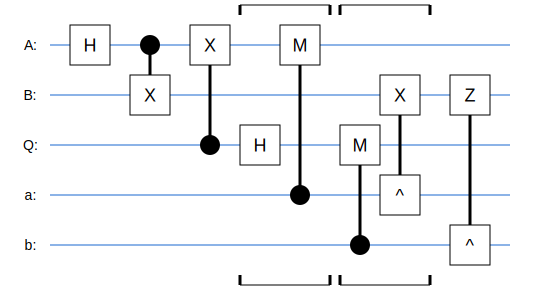

In [7]:
import cirq.contrib.svg as svg

# Display the circuit
print("Quantum Teleportation Protocol Circuit:")
print(protocol)

# Display the circuit using SVGCircuit
svg_circuit = svg.SVGCircuit(protocol)
display(svg_circuit)

## Part 2: Define a Random $U$ Gate with Random Parameters

### The Role of the Random $U$ Gate in Quantum Teleportation

The random unitary gate ($U$ gate) is an essential component in this quantum teleportation demonstration for several reasons:

1. **Creating an Arbitrary Quantum State**:
   - The objective of quantum teleportation is to transfer an arbitrary quantum state from one qubit (Alice's) to another (Bob's) without physically moving the qubit itself.
   - The random unitary gate is applied to the initial $|0\rangle$ state of qubit $Q$ to transform it into a random quantum state. This simulates a scenario where the state to be teleported is unknown and could be any valid quantum state.

2. **Testing the Protocol's Functionality**:
   - By using a randomly generated unitary transformation, the teleportation protocol is tested against a wide range of possible states, ensuring its capability to handle any quantum state.
   - This adds robustness to the test, as the random gate can produce diverse states, challenging the teleportation process to correctly manage and transfer these states.

3. **Verification of Teleportation**:
   - After executing the teleportation protocol, the inverse of the random unitary gate is applied to Bob's qubit to verify the teleportation's accuracy.
   - If the teleportation is successful, the inverse transformation should return Bob's qubit to the $|0\rangle$ state, effectively reversing the initial transformation. Measuring the qubit should confirm this return to $|0\rangle$ , validating the teleportation process.

In summary, the random unitary gate is critical for creating a diverse range of test states and verifying the teleportation protocol's ability to accurately transfer arbitrary quantum states.


### Step 2.1: Create Function to Generate Random Gate Matrix

In this step, we define a function to generate the matrix representation of a unitary gate using the random parameters $\theta$, $\phi$, and $\lambda$. This matrix specifies how the unitary gate transforms a quantum state.

**Background**:
A single-qubit unitary matrix can be parameterized using three angles: $\theta$, $\phi$, and $\lambda$. This general form allows for a wide range of transformations that can be applied to a qubit:

$$
U(\theta, \phi, \lambda) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i \lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i \phi} \sin\left(\frac{\theta}{2}\right) & e^{i (\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

**How to Use This Formula**:

1. **Parameter Generation**:
   - Randomly generate the values for $\theta$, $\phi$, and $\lambda$, each within the range of $0$ to $2\pi$. These parameters define the specific transformation applied by the gate.

2. **Matrix Construction**:
   - The matrix is constructed using these parameters:
     - $\cos\left(\frac{\theta}{2}\right)$ and $\sin\left(\frac{\theta}{2}\right)$ determine the amplitude adjustments.
     - The exponential terms $e^{i \lambda}$ and $e^{i \phi}$ introduce phase shifts, critical for capturing the unitary's effect.

3. **Matrix Representation**:
   - The function `random_unitary_gate_matrix` uses these parameters to compute and return the matrix as a NumPy array, making it suitable for integration into a quantum circuit.


In [8]:
# Define the matrix for the unitary gate using the random parameters
def random_unitary_gate_matrix(theta, phi, lam):
    return np.array([
        [np.cos(theta / 2), -np.exp(1j * lam) * np.sin(theta / 2)],
        [np.exp(1j * phi) * np.sin(theta / 2), np.exp(1j * (phi + lam)) * np.cos(theta / 2)]
    ])

### Step 2.2: Define Parameters and Create the Random Gate

In this step, we define the random parameters for the unitary gate and create its matrix representation. This matrix demonstrates the transformation applied by the gate to a quantum state.

**Process**:

1. **Define Random Parameters**:
   - Generate random values for $\theta$, $\phi$, and $\lambda$ within the range $0$ to $2\pi$. These parameters determine the specific characteristics of the unitary transformation.

2. **Create the Random Gate Matrix**:
   - Compute the matrix representation of the unitary gate using the `random_unitary_gate_matrix` function with the generated parameters. This matrix describes how the gate modifies the amplitude and phase of a qubit.

3. **Create the `MatrixGate`**:
   - Convert the matrix into a Cirq `MatrixGate` using `cirq.MatrixGate(random_gate_matrix)`. This allows us to apply the gate in a Cirq quantum circuit.

4. **Display the Matrix**:
   - Print the matrix to visualize the unitary gate's transformation properties. This step helps in understanding the effects of the random unitary operation on a quantum state.


In [9]:
# Define random parameters
theta = random.random() * 2 * pi
phi = random.random() * 2 * pi
lam = random.random() * 2 * pi

# Create the random gate matrix and then create random gate
random_gate_matrix = random_unitary_gate_matrix(theta, phi, lam)
random_gate = cirq.MatrixGate(random_gate_matrix)

# Display the matrix representation of the random gate
print("Matrix representation of the random gate:\n")
print(random_gate_matrix)

Matrix representation of the random gate:

[[-0.9085763 +0.j          0.36338968+0.20600254j]
 [ 0.37240587+0.18921675j  0.50169727+0.75750297j]]


## Part 3: Testing the Teleportation Protocol

- In this part, we test the teleportation protocol to ensure it correctly transfers a quantum state from Alice to Bob. We achieve this by applying a randomly generated single-qubit gate to a qubit and then teleporting the state.


### Step 3.1: Apply the Random Gate to the Initial State

- We initialize a new quantum circuit including the qubits and classical registers used in the teleportation protocol. We then apply the randomly selected unitary gate to qubit $Q$, transforming its initial state $|0\rangle$ into a random quantum state. This setup allows us to simulate the teleportation of a non-trivial state.

In [10]:
# Define qubits
qubit = cirq.NamedQubit('Q')   # Qubit to be teleported
ebit0 = cirq.NamedQubit('A')   # Alice's entangled qubit 0
ebit1 = cirq.NamedQubit('B')   # Alice's entangled qubit 1

# Create a new circuit
test = cirq.Circuit()

# Apply the randomly selected gate to qubit Q
test.append(random_gate.on(qubit))  # Apply the random UGate to qubit Q

test

┌                           ┐
Q: ───│-0.909+0.j     0.363+0.206j│───
      │ 0.372+0.189j  0.502+0.758j│
      └                           ┘

### Step 3.2: Append the Teleportation Protocol

In this step, we integrate the previously defined teleportation protocol into the circuit. This incorporates all necessary operations for quantum teleportation, including entanglement, gate operations, and measurements.

**Process**:
- Use the `append` method to add the teleportation protocol to the circuit created in the previous step. This step ensures that the full teleportation process is included in the circuit setup.


In [11]:
# Append the entire teleportation protocol from above
test.append(protocol)   # Add the previously defined teleportation protocol to the current circuit

test

┌──┐   ┌──┐
A: ───────────────────────────────────H───@───X─────M───────────────
                                          │   │     ║
B: ───────────────────────────────────────X───┼─────╫──────X────Z───
                                              │     ║      ║    ║
      ┌                           ┐           │     ║      ║    ║
Q: ───│-0.909+0.j     0.363+0.206j│───────────@────H╫─────M╫────╫───
      │ 0.372+0.189j  0.502+0.758j│                 ║     ║║    ║
      └                           ┘                 ║     ║║    ║
                                                    ║     ║║    ║
a: ═════════════════════════════════════════════════@═════╬^════╬═══
                                                          ║     ║
b: ═══════════════════════════════════════════════════════@═════^═══
                                                  └──┘   └──┘

### Step 3.3: Apply the Inverse of the Random Gate and Measure

In this step, we apply the inverse (i.e., conjugate transpose) of the random gate to qubit $B$. By measuring qubit $B$, we can verify the correctness of the teleportation process if it returns to the $|0\rangle$ state.

In [12]:
# Create the inverse gate
inverse_matrix = np.linalg.inv(random_gate_matrix)
inverse_gate = cirq.MatrixGate(inverse_matrix)

# Apply the inverse of the random unitary to qubit B
test.append(inverse_gate.on(ebit1))

# Measure the state of qubit B and store the result
test.append(cirq.measure(ebit1, key='Result'))

### Step 3.4: Display the Circuit

- To visualize the test circuit, we display the entire setup, including the application of the random gate, the teleportation protocol, and the inverse gate.

In [13]:
# Display the circuit
print("Final Circuit:\n")
print(test)

Final Circuit:

                                                  ┌──┐   ┌──┐
A: ───────────────────────────────────H───@───X─────M─────────────────────────────────────────────────────────────
                                          │   │     ║
                                          │   │     ║               ┌                           ┐
B: ───────────────────────────────────────X───┼─────╫──────X────Z───│-0.909+0.j     0.372-0.189j│───M('Result')───
                                              │     ║      ║    ║   │ 0.363-0.206j  0.502-0.758j│
                                              │     ║      ║    ║   └                           ┘
                                              │     ║      ║    ║
      ┌                           ┐           │     ║      ║    ║
Q: ───│-0.909+0.j     0.363+0.206j│───────────@────H╫─────M╫────╫─────────────────────────────────────────────────
      │ 0.372+0.189j  0.502+0.758j│                 ║     ║║    ║
      └                        

## Part 4: Run the Simulation and Analyze Results

In this part, we use Cirq's simulator to run the quantum circuit and analyze the results by plotting histograms of the measurement outcomes. We will see the statistics for the classical bits, focusing on whether the teleportation was successful.

**Process**:

1. **Create a Simulator Instance**:
   - Initialize a Cirq simulator to run the quantum circuit.

2. **Run the Quantum Circuit**:
   - Execute the quantum circuit with 1000 repetitions to gather sufficient measurement data.

3. **Plot the Histogram**:
   - Generate a histogram of the measurement outcomes to visualize the distribution of results.


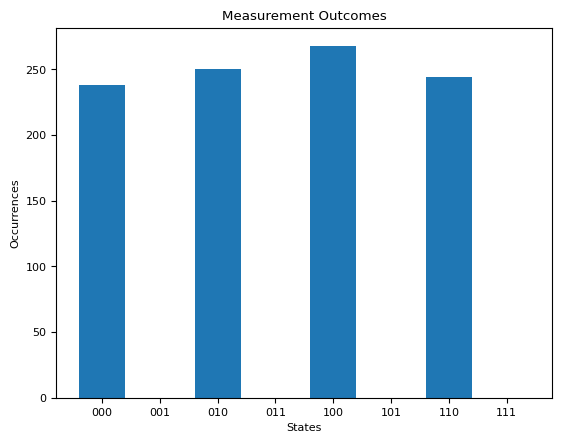

In [14]:
# Create a simulator instance
simulator = cirq.Simulator()

# Run the quantum circuit on the simulator and get the result
result = simulator.run(test, repetitions=1000)  # Run the circuit with 1000 repetitions

# Plot the histogram of the measurement outcomes
hist = cirq.plot_state_histogram(result, plt.subplot(), title='Measurement Outcomes', xlabel='States', ylabel='Occurrences', tick_label=binary_labels(3))

plt.show()

### Result Analysis of Quantum Teleportation Protocol

The quantum teleportation protocol was implemented and simulated to verify its correctness. Here’s a detailed analysis of the results obtained from the simulation:

1. **Circuit Overview:**
   - The quantum circuit consists of preparing an entangled pair of qubits $A$ and $B$, performing operations on qubit $Q$ (the one to be teleported), measuring the qubits, and applying conditional operations based on the measurement results.

2. **Measurement Results:**
   - The histogram of measurement outcomes from the final circuit is analyzed to determine the success of the teleportation.

3. **Expected Outcomes:**
   - In the final measurement, `the states where the last qubit is 0 should ideally have non-zero counts`. This is because qubit $B$ is supposed to match the state of qubit $Q$ after teleportation, and any discrepancies would manifest as deviations in these outcomes.
   - The states `001`, `011`, `101`, and `111` should ideally have zero counts. This indicates that the final state of qubit $B$ is consistent with the teleported state and that the effect of the random unitary gate has been correctly reversed.

4. **Interpreting the Histogram:**
   - The histogram shows that the states where the last qubit is 0 (i.e., `000`, `010`, `100`, `110`) have non-zero counts. This result confirms that the teleportation protocol has successfully transferred the state from qubit $Q$ to qubit $B$.
   - The absence of states `001`, `011`, `101`, and `111` supports the correctness of the teleportation, indicating that the quantum state was accurately teleported and reconstructed on qubit $B$.

In summary, the measurement outcomes align with the expected results, demonstrating that the quantum teleportation protocol was executed successfully and the qubit state was correctly teleported.
